# DSA5104 Project Exploratory Data Analysis

In [18]:
filename_calendar = 'calendar.csv'
filename_listings_sum = 'listings_summary.csv'
filename_listings = 'listings.csv'
filename_reviews_sum = 'reviews_summary.csv'
filename_reviews = 'reviews.csv'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
calendar = pd.read_csv(filename_calendar, dtype = str)
listings_summary = pd.read_csv(filename_listings_sum, dtype = str)
listings = pd.read_csv(filename_listings, dtype = str)
reviews_summary = pd.read_csv(filename_reviews_sum, dtype = str)
reviews = pd.read_csv(filename_reviews, dtype = str)

- Application perspective:
    - Hosts may be interested in how to give a reasonable price to their property;
    - Customers may be interested in how to compare betweeen different properties according to the requirements;


## Calendar
- this table shows:
    - for **each recorded apartment**, whether it is available in the 1-year time window;
    - also, it attaches with the corresponding price and order requirements (minima and maxima nights)

In [22]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,645048906856594097,2022-06-20,t,$890.00,$890.00,1,365
1,645048906856594097,2022-06-21,t,$890.00,$890.00,1,365
2,645048906856594097,2022-06-22,t,$890.00,$890.00,1,365
3,645048906856594097,2022-06-23,t,$890.00,$890.00,1,365
4,645048906856594097,2022-06-24,t,$890.00,$890.00,1,365


In [23]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].apply(lambda x : float(x[1:].replace(',', '')))
calendar['adjusted_price'] = calendar['adjusted_price'].apply(lambda x : float(x[1:].replace(',', '')))

In [24]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,645048906856594097,2022-06-20,t,890.0,890.0,1,365
1,645048906856594097,2022-06-21,t,890.0,890.0,1,365
2,645048906856594097,2022-06-22,t,890.0,890.0,1,365
3,645048906856594097,2022-06-23,t,890.0,890.0,1,365
4,645048906856594097,2022-06-24,t,890.0,890.0,1,365


### 1. Month versus average price

In [25]:
# month - average price
### using .to_dict() -> can generate the month-average_price mapping
calendar['monofyear'] = calendar.date.dt.strftime('%B')

In [26]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,monofyear
0,645048906856594097,2022-06-20,t,890.0,890.0,1,365,June
1,645048906856594097,2022-06-21,t,890.0,890.0,1,365,June
2,645048906856594097,2022-06-22,t,890.0,890.0,1,365,June
3,645048906856594097,2022-06-23,t,890.0,890.0,1,365,June
4,645048906856594097,2022-06-24,t,890.0,890.0,1,365,June


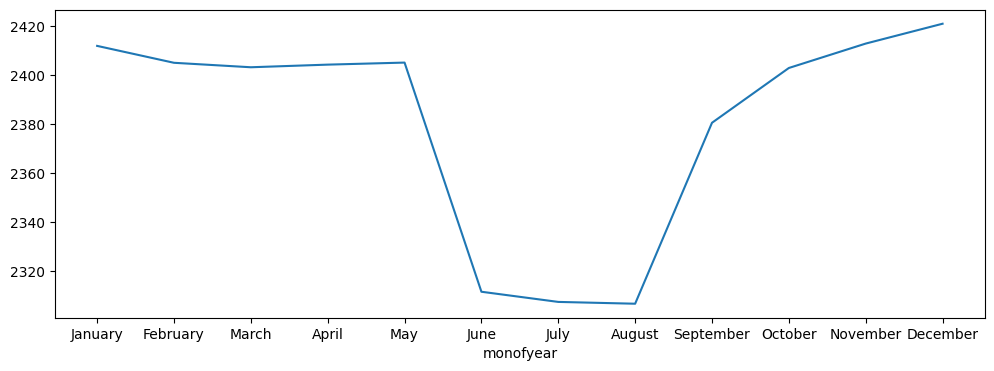

In [27]:
Index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mon_avgprice = calendar.groupby('monofyear')['price'].mean().reindex(Index)
mon_avgprice.plot(figsize = (12,4))
ticks = list(range(0,12))
labels = Index
tmp = plt.xticks(ticks,labels)

### 2. weakofday versus average price

In [28]:
calendar['weakofmon'] = calendar.date.dt.strftime('%A')

In [29]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,monofyear,weakofmon
0,645048906856594097,2022-06-20,t,890.0,890.0,1,365,June,Monday
1,645048906856594097,2022-06-21,t,890.0,890.0,1,365,June,Tuesday
2,645048906856594097,2022-06-22,t,890.0,890.0,1,365,June,Wednesday
3,645048906856594097,2022-06-23,t,890.0,890.0,1,365,June,Thursday
4,645048906856594097,2022-06-24,t,890.0,890.0,1,365,June,Friday


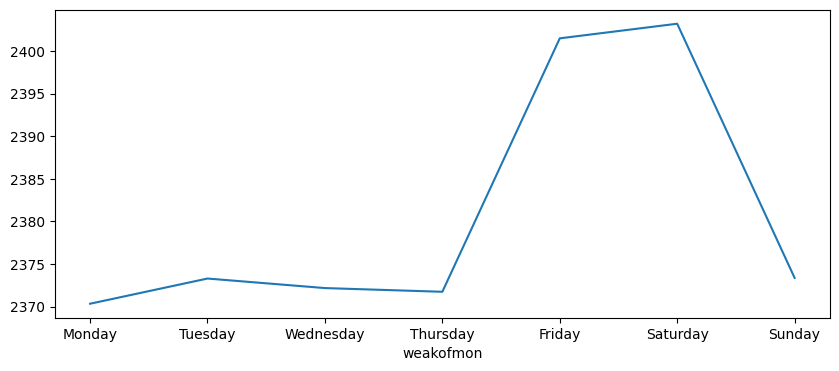

In [30]:
Index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mon_avgprice = calendar.groupby('weakofmon')['price'].mean().reindex(Index)
mon_avgprice.plot(figsize = (10,4))
ticks = list(range(0,7))
labels = Index
tmp = plt.xticks(ticks,labels)

### 3.  busy rate behavior among one year

In [12]:
calendar['isbusy'] = calendar['available'].apply(lambda x: 0 if x == 't' else 1)

In [13]:
tmp = calendar.groupby('date')['isbusy'].mean().reset_index()

Text(0.5, 0, 'date')

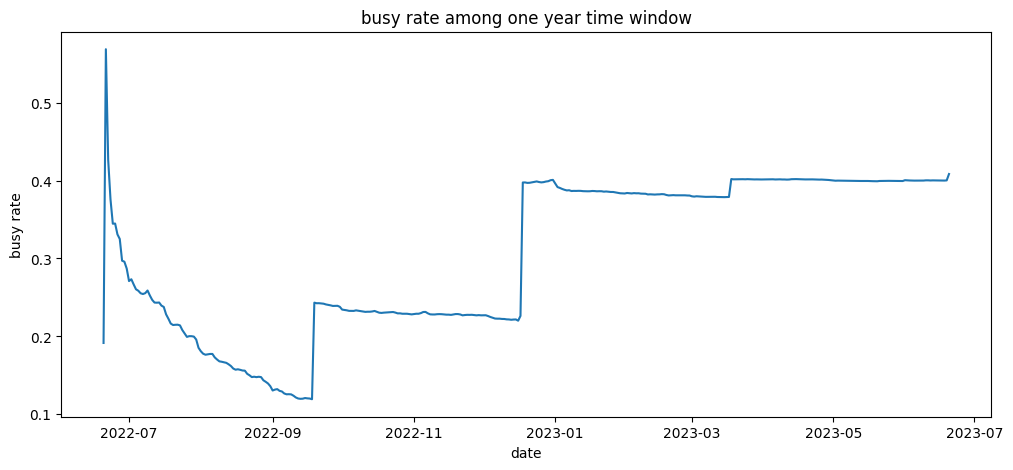

In [14]:
plt.figure(figsize = (12, 5))
plt.plot(tmp['date'], tmp['isbusy'])
plt.title('busy rate among one year time window')
plt.ylabel('busy rate')
plt.xlabel('date')

#### Analysis:
- The first significant decay is mainly because, after that, they are busy rate in the future
    - Therefore, it is obvious that future busy rate will be smaller since it is advanced;
- The second significant decay might be, people tend to make reservation within 1 year.
- From 2022-07 to 2022-10, the busy rate keeps on increasing
    - This is highly to be the result of policy changes towards COVID-19

## Listings_summary
- this table shows:
    - the listed apartment with its corresponding id
    - host information
        - name
        - id
        - total listings number
    - geographic information
        - district
        - latitude and longitude
    - basic information
        - room type
        - price etc.
    - reviews information
    - availability in 1-year time window
    - license

### 1. Host-related exploration

#### a) One host might have several properties

In [125]:
listings_summary[listings_summary['host_id'] == '432181188'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,53599197,⊙T4 12/25 Popular Condo near IMPACTThunder dom...,432181188,Roberto,NaN,Lak Si,13.91542,100.55452,Entire home/apt,504,1,0,NaN,NaN,4,265,0,NaN
16624,53580358,⊙T4 2/60 Popular Condo near IMPACT/Thunder dom...,432181188,Roberto,NaN,Lak Si,13.91098,100.54933,Entire home/apt,513,1,1,2022-04-27,0.54,4,358,1,NaN
16846,53599730,⊙C7 6/42 Popular Condo near IMPACT/Thunder dom...,432181188,Roberto,NaN,Lak Si,13.9067,100.55295,Entire home/apt,510,1,0,NaN,NaN,4,254,0,NaN
17071,53598636,⊙T2 4/25 Popular Condo near IMPACT/Thunder dom...,432181188,Roberto,NaN,Don Mueang,13.91598,100.55712,Entire home/apt,512,1,0,NaN,NaN,4,239,0,NaN


#### Hosts and their corresponding number of listings

In [31]:
### achieve the (host_id, host_listings_count) pairs by dropping duplicates
listings_summary['calculated_host_listings_count'] = listings_summary['calculated_host_listings_count'].astype(int)
tmp = listings_summary[['host_id', 'host_name', 'calculated_host_listings_count']].drop_duplicates()

### normalization
tmp['calculated_host_listings_count'] = tmp['calculated_host_listings_count'].apply(lambda x: 10 if x >= 10 else x)

<AxesSubplot: ylabel='calculated_host_listings_count'>

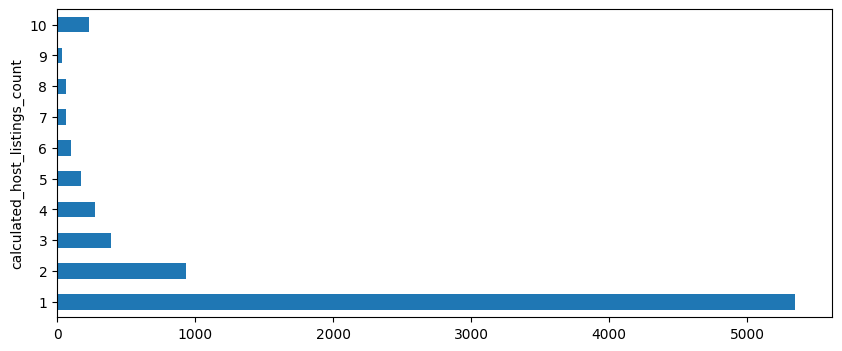

In [36]:
tmp.groupby('calculated_host_listings_count')['host_id'].count().plot(kind = 'barh', figsize = (10,4))

- It can be observed that, most hosts just have 1 property;
    - in this figure, '10' means have larger than 10 properties.

### 2. Neighbourhood-related exploration

#### a) clustering-behavior for the listings
- a very natural idea is to check, whether there exists some connection betweeen the price and the district for listings

In [38]:
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37433623,ฺBRIGHTON,248345247,Tanapachcharapon,NaN,Bang Sue,13.8485,100.51368,Entire home/apt,900,7,0,NaN,NaN,1,151,0,NaN
1,53599197,⊙T4 12/25 Popular Condo near IMPACTThunder dom...,432181188,Roberto,NaN,Lak Si,13.91542,100.55452,Entire home/apt,504,1,0,NaN,NaN,4,265,0,NaN
2,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1942,3,65,2020-01-06,0.52,2,362,0,NaN
3,645048906856594097,Furnished 1 bedroom condo with beautiful view,4663219,Fawad,NaN,Bang Sue,13.843799037843002,100.51220275461674,Entire home/apt,712,1,0,NaN,NaN,1,365,0,NaN
4,15636062,Akesin place ngamwongwan,100840975,Supika,NaN,Bang Sue,13.8589,100.52739,Private room,2500,2,0,NaN,NaN,1,362,0,NaN


In [39]:
## neighhbourhood_group is always NULL!!
listings_summary['neighbourhood_group'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: neighbourhood_group, dtype: object

- check the distribution of each neighbouhood

In [40]:
## neighbourhood can show the clustering behavior of different listed properties
## statistical counts among different neighbourhood
density_neighb = listings_summary.groupby('neighbourhood')['host_id'].count()
density_neighb

neighbourhood
Bang Bon                   4
Bang Kapi                284
Bang Khae                103
Bang Khen                131
Bang Kho laen            138
Bang Khun thain           25
Bang Na                  690
Bang Phlat               236
Bang Rak                 913
Bang Sue                 312
Bangkok Noi              133
Bangkok Yai              104
Bueng Kum                 48
Chatu Chak               555
Chom Thong                70
Din Daeng                474
Don Mueang               241
Dusit                    101
Huai Khwang             1180
Khan Na Yao               58
Khlong Sam Wa             35
Khlong San               400
Khlong Toei             2116
Lak Si                   333
Lat Krabang              223
Lat Phrao                 57
Min Buri                  71
Nong Chok                 19
Nong Khaem                19
Parthum Wan              447
Phasi Charoen            162
Phaya Thai               472
Phra Khanong             573
Phra Nakhon              625


- there are some districts that have more properties, might be more popular for tourists

In [41]:
## neighbourhood can show the clustering behavior of different listed properties
## average price among different neighbourhood
listings_summary['price'] = listings_summary['price'].astype(float)
price_neighb = listings_summary.groupby('neighbourhood')['price'].mean()
price_neighb

neighbourhood
Bang Bon                1518.500000
Bang Kapi               1395.584507
Bang Khae               4781.699029
Bang Khen               1313.503817
Bang Kho laen           1959.202899
Bang Khun thain         3266.360000
Bang Na                 1621.956522
Bang Phlat              1366.949153
Bang Rak                2668.239869
Bang Sue                1830.634615
Bangkok Noi             2120.308271
Bangkok Yai             2014.201923
Bueng Kum               2319.666667
Chatu Chak              1810.859459
Chom Thong              2025.771429
Din Daeng               2541.694093
Don Mueang              1305.224066
Dusit                   2789.445545
Huai Khwang             2060.644068
Khan Na Yao             2071.844828
Khlong Sam Wa           2114.800000
Khlong San              2302.512500
Khlong Toei             3070.109641
Lak Si                  1250.729730
Lat Krabang             3477.677130
Lat Phrao               2984.912281
Min Buri                1554.690141
Nong Chok     

- without normalization

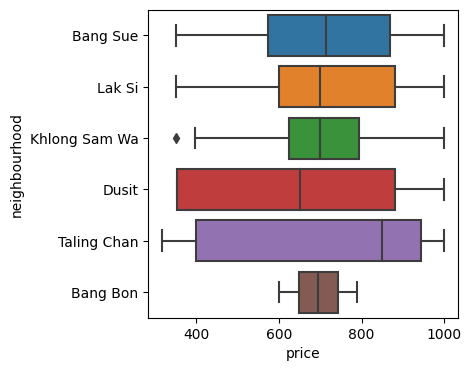

In [68]:
plt.figure(figsize = (4, 4))
visual_list = ['Bang Sue', 'Lak Si', 'Khlong Sam Wa', 'Dusit', 'Taling Chan', 'Bang Bon']
data_visual = listings_summary[listings_summary['neighbourhood'].apply(lambda x: 1 if x in visual_list else 0) == 1]
sns.boxplot(x='price', y='neighbourhood', data = data_visual.loc[(listings_summary.price <= 1000) & (listings_summary.price > 0)], orient = 'h')
plt.show()

- with normalization

In [56]:
price_neighb_visual = data_visual.groupby('neighbourhood')['price'].mean()
price_neighb_visual

neighbourhood
Bang Bon         1518.500000
Bang Sue         1830.634615
Dusit            2789.445545
Khlong Sam Wa    2114.800000
Lak Si           1250.729730
Taling Chan      4312.901961
Name: price, dtype: float64

In [61]:
density_neighb_visual = data_visual.groupby('neighbourhood')['price'].count()
density_neighb_visual

neighbourhood
Bang Bon           4
Bang Sue         312
Dusit            101
Khlong Sam Wa     35
Lak Si           333
Taling Chan       51
Name: price, dtype: int64

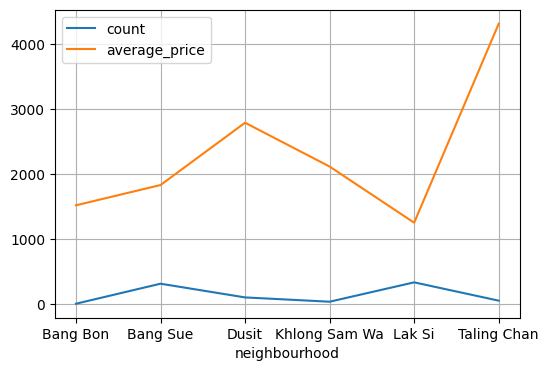

In [67]:
density_neighb_visual.plot()
price_neighb_visual.plot(figsize = (6,4))
plt.grid()
plt.legend(['count', 'average_price'])

- it can be seen from graph that:
    - extremely expensive districts will not have too many properties, since
        - not many people can suffer those properties
        - not all hosts can afford that
    - extremely cheap districts also will not have too man properties, since
        - hosts may think that, it is not a good choice to make money from them;
    - intermediate districts are popular!

### 3. Basic-information exploration

#### a) room type versus price

In [198]:
listings_summary[['room_type', 'price']].groupby('room_type').describe()

price                                                    \
                  count         mean           std    min     25%     50%   
room_type                                                                   
Entire home/apt  9224.0  2363.971379   7370.344133  279.0  880.00  1300.0   
Hotel room        794.0  2250.458438   4165.669255    0.0  882.25  1400.0   
Private room     6445.0  2008.572692   6466.157399  227.0  730.00  1099.0   
Shared room       611.0  3415.780687  60690.186804  275.0  353.00   450.0   

                                    
                    75%        max  
room_type                           
Entire home/apt  2100.0   303309.0  
Hotel room       2376.0    99999.0  
Private room     1850.0   300000.0  
Shared room       650.0  1500000.0

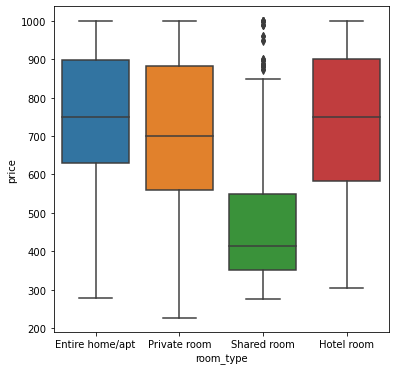

In [202]:
plt.figure(figsize = (6, 6))
sns.boxplot(x='room_type', y='price', data = listings_summary.loc[(listings_summary.price <= 1000) & (listings_summary.price > 0)])
plt.show()

#### b) number of rooms versus price

In [69]:
listings['price'] = listings['price'].apply(lambda x : float(x[1:].replace(',', '')))

In [70]:
# fill in the NaN for 'bedrooms' attribute
listings['bedrooms'] = listings['bedrooms'].fillna(-1)

In [71]:
listings['bedrooms'] = listings['bedrooms'].astype(int)
listings[['bedrooms', 'price']].groupby('bedrooms').describe()

price                                                         \
            count          mean           std     min       25%      50%   
bedrooms                                                                   
-1         1703.0   2097.547270   9052.983104     0.0    720.00   1029.0   
 1        12097.0   1770.675291  14512.103057   227.0    720.00   1022.0   
 2         2260.0   3082.824336   5123.604726   334.0   1500.00   2103.0   
 3          569.0   5215.349736  13936.208236   350.0   2118.00   3395.0   
 4          238.0   7566.516807  11450.832676   350.0   3325.00   4800.0   
 5           88.0   7416.193182  12148.797898   350.0   3396.25   5000.0   
 6           46.0  16151.304348  45096.001975   500.0   2590.75   6240.0   
 7           14.0  13393.857143  22195.504170   650.0   4857.25   7769.0   
 8            9.0   7715.111111   6134.553721   699.0    930.00   8000.0   
 9            5.0   6662.400000   7053.209645   700.0   2645.00   2997.0   
 10          22.0   3071.863636   4624.009591   450.0    622.50    890.0   
 11           4.0  19567.500000  12617.762837   700.0  18603.25  25285.0   
 12           2.0    700.000000    212.132034   550.0    625.00    700.0   
 15           2.0    475.000000    106.066017   400.0    437.50    475.0   
 16           1.0    850.000000           NaN   850.0    850.00    850.0   
 20           6.0   8307.500000  17988.666918   450.0    562.50    772.5   
 23           1.0   1750.000000           NaN  1750.0   1750.00   1750.0   
 25           1.0    950.000000           NaN   950.0    950.00    950.0   
 30           2.0    650.000000    212.132034   500.0    575.00    650.0   
 39           1.0    920.000000           NaN   920.0    920.00    920.0   
 40           1.0   4500.000000           NaN  4500.0   4500.00   4500.0   
 46           1.0   1800.000000           NaN  1800.0   1800.00   1800.0   
 50           1.0    936.000000           NaN   936.0    936.00    936.0   

                               
               75%        max  
bedrooms                       
-1         1766.00   263896.0  
 1         1550.00  1500000.0  
 2         3000.00    99999.0  
 3         5000.00   300000.0  
 4         8000.00    99999.0  
 5         6555.00    99999.0  
 6         8999.00   303309.0  
 7         9398.75    88000.0  
 8        10300.00    17857.0  
 9         8970.00    18000.0  
 10        2550.00    18000.0  
 11       26249.25    27000.0  
 12         775.00      850.0  
 15         512.50      550.0  
 16         850.00      850.0  
 20        1961.25    45000.0  
 23        1750.00     1750.0  
 25         950.00      950.0  
 30         725.00      800.0  
 39         920.00      920.0  
 40        4500.00     4500.0  
 46        1800.00     1800.0  
 50         936.00      936.0

- it is unreasonable that one house can have more than twelve bedrooms!
    - kick out

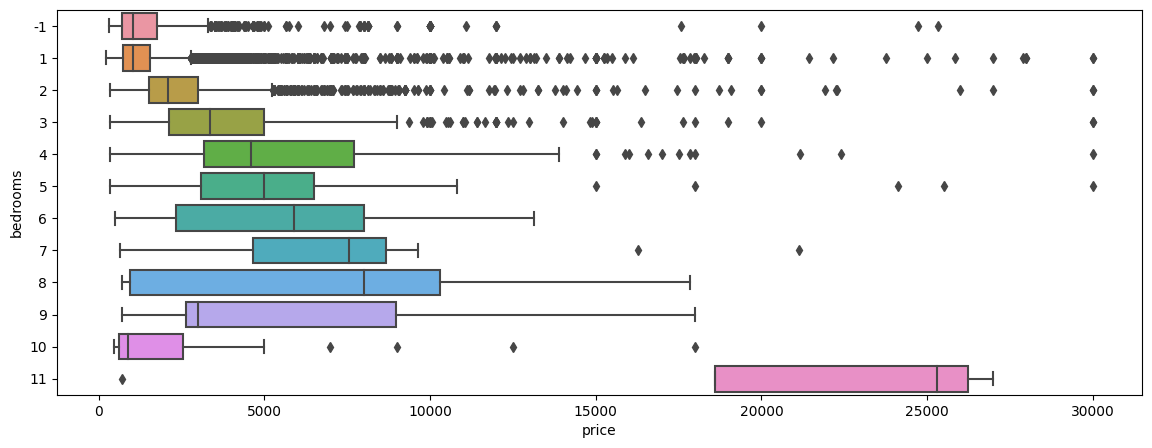

In [74]:
plt.figure(figsize = (14, 5))
sns.boxplot(y='bedrooms', x='price', data = listings.loc[(listings.price <= 30000) & (listings.price > 0) & (listings.bedrooms <= 11)], orient = 'h' )
plt.show()

- compare with other large number, **10 seems to appear more frequently**
    - people may prefer use 10 bedrooms to show that there are many many bedrooms
    - 10 might be not a concrete number
- Generally speaking, more bedrooms the house has, more expensive the price is;

In [239]:
listings[listings['bedrooms'] == 10]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1157,8433088,https://www.airbnb.com/rooms/8433088,20220620202126,2022-06-21,Lanna Kala boutique resort,We are unique homemade chic & chill boutique r...,NaN,https://a0.muscache.com/pictures/c8ee08f7-5755...,2568669,https://www.airbnb.com/users/show/2568669,...,3.5,3.5,3.5,NaN,f,1,0,1,0,0.04
2583,14389816,https://www.airbnb.com/rooms/14389816,20220620202126,2022-06-20,Platinum place resident,"My place is close to the city center, great vi...",NaN,https://a0.muscache.com/pictures/c43cc3e4-55b4...,42498831,https://www.airbnb.com/users/show/42498831,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3312,17289747,https://www.airbnb.com/rooms/17289747,20220620202126,2022-06-20,Accom Apartment,We are well functioned accommodation that has ...,- Donmuang Airport<br />- Dhurakij Pundit Univ...,https://a0.muscache.com/pictures/4fa7ee3b-cde4...,116634915,https://www.airbnb.com/users/show/116634915,...,5.0,5.0,5.0,NaN,t,2,0,2,0,0.02
3593,17795162,https://www.airbnb.com/rooms/17795162,20220620202126,2022-06-20,Punsamon Place 091-7904559,ที่ของฉันใกล้กับสนามบินดอนเมือง ศูนย์ราชการ ค...,NaN,https://a0.muscache.com/pictures/a17d16fc-a59e...,121588678,https://www.airbnb.com/users/show/121588678,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
5153,22910495,https://www.airbnb.com/rooms/22910495,20220620202126,2022-06-20,15-Min from Dmk Apartment Net House (เน็ตเฮ้าส์),อพาทเมนต์ที่พร้อมเข้าอยู่ Full furnished มีทั้...,NaN,https://a0.muscache.com/pictures/b2aa4f8b-c386...,156718651,https://www.airbnb.com/users/show/156718651,...,5.0,4.0,4.6,NaN,t,1,0,1,0,0.11
5817,24947795,https://www.airbnb.com/rooms/24947795,20220620202126,2022-06-20,ICE RESIDENCE,"Near Lat Kra Bang Hospital, Near Suvarnabhumi...",NaN,https://a0.muscache.com/pictures/0f389ccc-42bd...,188616926,https://www.airbnb.com/users/show/188616926,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
5906,25548273,https://www.airbnb.com/rooms/25548273,20220620202126,2022-06-21,"2Houses+10Bed+10Bath, Daily Cleaning, Free Pic...",+ Our 2 townhouses will tell you my unique exp...,NaN,https://a0.muscache.com/pictures/a3017fa9-9f7d...,6906718,https://www.airbnb.com/users/show/6906718,...,5.0,5.0,5.0,NaN,f,24,6,15,0,0.06
7352,30543577,https://www.airbnb.com/rooms/30543577,20220620202126,2022-06-21,City center Hostel for Group +26 pax/Wifi&7min...,"COOPER is located in Silom area, close to the ...",This part of Silom has a unique characteristic...,https://a0.muscache.com/pictures/a1b594ac-b6d2...,178348985,https://www.airbnb.com/users/show/178348985,...,NaN,NaN,NaN,NaN,f,12,0,7,0,NaN
11431,39875840,https://www.airbnb.com/rooms/39875840,20220620202126,2022-06-21,Narasiri Place,Just across the street from King Mongkut’s Ins...,NaN,https://a0.muscache.com/pictures/1a198fb0-f71c...,307082478,https://www.airbnb.com/users/show/307082478,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
11685,40528501,https://www.airbnb.com/rooms/40528501,20220620202126,2022-06-20,ซาฟียองซ์เพลส ตลาดนัดรถไฟ ซีคอนสแควร พาราไดซ์พ...,NaN,NaN,https://a0.muscache.com/pictures/50e98581-1710...,285591880,https://www.airbnb.com/users/show/285591880,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


- after checking, it can be confirmed that most of these refer to the hotels (totally have 10 bedrooms)

In [290]:
listings[listings['bedrooms'] == 11]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5785,25179014,https://www.airbnb.com/rooms/25179014,20220620202126,2022-06-20,เมอร์ริต แมนชั่น Merit Mansion,ห้องพักรายวัน Daily Rooms ...,NaN,https://a0.muscache.com/pictures/a8309edd-ba27...,190257506,https://www.airbnb.com/users/show/190257506,...,5.0,5.0,5.0,NaN,t,1,0,1,0,0.02
11516,40393133,https://www.airbnb.com/rooms/40393133,20220620202126,2022-06-21,11 Bedroom Private villa near BTS Thonglor CBD,Beautiful stylish 11 Bedroom villa located in ...,NaN,https://a0.muscache.com/pictures/ac91a27c-840f...,312232033,https://www.airbnb.com/users/show/312232033,...,5.0,5.0,5.0,NaN,t,1,1,0,0,0.03
12547,41842576,https://www.airbnb.com/rooms/41842576,20220620202126,2022-06-21,Entire Luxury House with Roof-Top Pool in Thon...,My home is a safe environment as we make sanit...,"Fantastic restaurants, bars, and nightlife mak...",https://a0.muscache.com/pictures/6aa9574b-49f1...,222000961,https://www.airbnb.com/users/show/222000961,...,5.0,5.0,5.0,NaN,t,6,6,0,0,0.45
12555,42217929,https://www.airbnb.com/rooms/42217929,20220620202126,2022-06-21,Private 11 Bedroom lux Villa near Thonglor BTS,The Matta Bangkok is located in the heart of m...,Walking distance to Thonglo BTS,https://a0.muscache.com/pictures/fbed6a86-768f...,219983414,https://www.airbnb.com/users/show/219983414,...,5.0,5.0,5.0,NaN,t,8,4,4,0,0.45


#### we try to make 4 levels for number of bedrooms

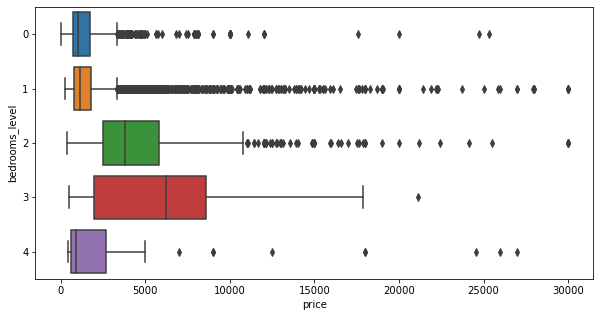

In [297]:
def bedroom2level(x):
    if x==-1:
        return 0
    elif x<=2:
        return 1
    elif x<=5:
        return 2
    elif x<=8:
        return 3
    else:
        return 4

listings['bedrooms_level'] = listings['bedrooms'].apply(bedroom2level)
plt.figure(figsize = (10, 5))
sns.boxplot(y='bedrooms_level', x='price', data = listings.loc[(listings.price <= 30000)], orient = 'h')
plt.show()

- To conclude, if the 'bedrooms' attribute is very big:
    - 1. It is the flat, which is very expensive
    - 2. It is the hotel, which is cheap
- Generally speaking, when 'bedrooms' attribute is not too big, the more bedrooms the house has, the more expensive it will be
- However, when 'bedrooms' attribute has a very big value, it is very likely that, it is a hotel

### 4. Reviews-related exploration

In [280]:
listings_summary['number_of_reviews'] = listings_summary['number_of_reviews'].astype(int)
tmp = listings_summary[['price', 'number_of_reviews']]

In [281]:
tmp.head()

,price,number_of_reviews
0,900.0,0
1,504.0,0
2,1942.0,65
3,712.0,0
4,2500.0,0


In [282]:
tmp.groupby('number_of_reviews').describe()

price                                                     \
                    count         mean           std     min     25%     50%   
number_of_reviews                                                              
0                  7062.0  2937.642594  20038.619777     0.0   800.0  1325.0   
1                  1862.0  1909.936627   3454.041460   227.0   790.5  1157.0   
2                  1058.0  1854.794896   6150.521002   305.0   741.0  1099.5   
3                   678.0  1928.783186   6739.799568   315.0   750.0  1100.0   
4                   489.0  1580.456033   2005.957495   306.0   750.0  1100.0   
...                   ...          ...           ...     ...     ...     ...   
471                   1.0  1900.000000           NaN  1900.0  1900.0  1900.0   
480                   1.0  1900.000000           NaN  1900.0  1900.0  1900.0   
521                   1.0   776.000000           NaN   776.0   776.0   776.0   
673                   1.0   900.000000           NaN   900.0   900.0   900.0   
1119                  1.0  1114.000000           NaN  1114.0  1114.0  1114.0   

                                       
                       75%        max  
number_of_reviews                      
0                  2472.00  1500000.0  
1                  2000.00    99990.0  
2                  1730.75   161440.0  
3                  1743.25   161516.0  
4                  1620.00    27898.0  
...                    ...        ...  
471                1900.00     1900.0  
480                1900.00     1900.0  
521                 776.00      776.0  
673                 900.00      900.0  
1119               1114.00     1114.0  

[287 rows x 8 columns]

- try to kick out those listings with extremely high price

In [283]:
# kick out those extrema
tmp = tmp[tmp.price <= 30000]

In [284]:
tmp.groupby('number_of_reviews').describe()

price                                                    \
                    count         mean          std     min     25%     50%   
number_of_reviews                                                             
0                  6996.0  2095.280017  2604.770919     0.0   800.0  1300.0   
1                  1859.0  1810.877891  2179.648776   227.0   790.0  1157.0   
2                  1055.0  1574.586730  1787.297320   305.0   741.0  1098.0   
3                   676.0  1617.485207  1975.150448   315.0   750.0  1100.0   
4                   489.0  1580.456033  2005.957495   306.0   750.0  1100.0   
...                   ...          ...          ...     ...     ...     ...   
471                   1.0  1900.000000          NaN  1900.0  1900.0  1900.0   
480                   1.0  1900.000000          NaN  1900.0  1900.0  1900.0   
521                   1.0   776.000000          NaN   776.0   776.0   776.0   
673                   1.0   900.000000          NaN   900.0   900.0   900.0   
1119                  1.0  1114.000000          NaN  1114.0  1114.0  1114.0   

                                     
                       75%      max  
number_of_reviews                    
0                  2400.00  30000.0  
1                  2000.00  27000.0  
2                  1705.00  27000.0  
3                  1705.75  25999.0  
4                  1620.00  27898.0  
...                    ...      ...  
471                1900.00   1900.0  
480                1900.00   1900.0  
521                 776.00    776.0  
673                 900.00    900.0  
1119               1114.00   1114.0  

[287 rows x 8 columns]

In [285]:
tmp['number_of_reviews'] = tmp['number_of_reviews'].apply(lambda x: 30 if x >= 30 else x)

In [286]:
tmp_groupby = tmp.groupby('number_of_reviews').describe()
tmp_groupby

price                                                   \
                    count         mean          std    min     25%     50%   
number_of_reviews                                                            
0                  6996.0  2095.280017  2604.770919    0.0  800.00  1300.0   
1                  1859.0  1810.877891  2179.648776  227.0  790.00  1157.0   
2                  1055.0  1574.586730  1787.297320  305.0  741.00  1098.0   
3                   676.0  1617.485207  1975.150448  315.0  750.00  1100.0   
4                   489.0  1580.456033  2005.957495  306.0  750.00  1100.0   
5                   398.0  1441.437186  1740.552984  325.0  700.00   956.0   
6                   327.0  1693.697248  2522.271648  304.0  754.50  1071.0   
7                   298.0  1450.785235  1147.164275  338.0  750.00  1059.5   
8                   249.0  1780.502008  1703.954902  331.0  783.00  1247.0   
9                   234.0  1436.423077  1398.075632  338.0  700.00  1044.0   
10                  187.0  1363.165775  1233.372485  350.0  689.50  1000.0   
11                  173.0  1551.803468  1355.612947  338.0  750.00  1130.0   
12                  155.0  1508.135484  2523.538286  343.0  684.00  1074.0   
13                  129.0  1672.193798  1617.006136  340.0  750.00  1200.0   
14                  140.0  1647.321429  2597.624724  450.0  744.75  1094.5   
15                  138.0  1282.572464   800.094793  330.0  744.75  1042.5   
16                  126.0  1652.111111  1572.709358  350.0  720.00  1100.0   
17                  134.0  1432.701493  1077.345213  320.0  743.25  1137.0   
18                  111.0  1440.423423  1244.776384  346.0  750.00  1043.0   
19                   98.0  1570.959184  1425.313269  322.0  796.25  1172.0   
20                   95.0  1580.978947  2375.368858  392.0  703.00  1007.0   
21                   72.0  1563.125000  1189.960751  350.0  730.75  1185.5   
22                   78.0  1711.948718  2237.979991  330.0  741.00  1155.0   
23                   71.0  1734.676056  1778.626700  353.0  797.50  1179.0   
24                   75.0  1519.920000  1282.477793  350.0  825.00  1157.0   
25                   66.0  1384.257576  1794.853723  350.0  699.25   972.0   
26                   77.0  1224.870130   892.820462  350.0  700.00   931.0   
27                   71.0  1382.323944  1002.758635  486.0  855.00  1050.0   
28                   60.0  1384.633333   935.563529  434.0  738.75  1115.0   
29                   66.0  1442.575758  1225.813401  350.0  666.00  1049.5   
30                 2279.0  1618.780606  1711.732183  267.0  800.00  1190.0   

                                     
                       75%      max  
number_of_reviews                    
0                  2400.00  30000.0  
1                  2000.00  27000.0  
2                  1705.00  27000.0  
3                  1705.75  25999.0  
4                  1620.00  27898.0  
5                  1500.00  17857.0  
6                  1529.50  25520.0  
7                  1697.50   8000.0  
8                  1983.00  15000.0  
9                  1596.50  15892.0  
10                 1556.50   8666.0  
11                 1731.00   8500.0  
12                 1434.50  25829.0  
13                 1913.00  13000.0  
14                 1891.00  30000.0  
15                 1539.75   5200.0  
16                 1737.50   8347.0  
17                 1711.25   6486.0  
18                 1477.00   7779.0  
19                 1759.25  10286.0  
20                 1441.50  18000.0  
21                 1800.25   5950.0  
22                 1849.25  18000.0  
23                 1866.50  10000.0  
24                 1527.50   6811.0  
25                 1392.75  13488.0  
26                 1371.00   5857.0  
27                 1460.00   5297.0  
28                 1561.75   4212.0  
29                 1671.25   8000.0  
30                 1766.00  30000.0

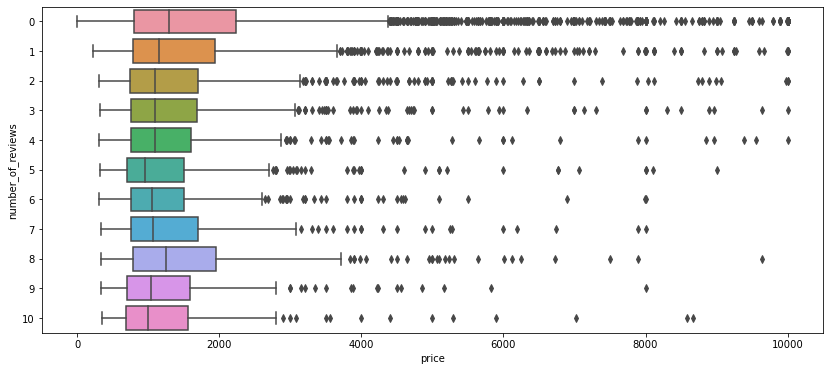

In [293]:
plt.figure(figsize = (14, 6))
sns.boxplot(y='number_of_reviews', x='price', data = tmp[(tmp.number_of_reviews <= 10) & (tmp.price <= 10000)], orient = 'h')
plt.show()

- there seems to be **not strong pattern** between price and number of reviews